In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("loan_application_prediction.csv")

In [55]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.shape

(614, 13)

In [57]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [61]:
#for categorical data replacing the Nan value with "most frequent" value using SimpleImputer
from numpy import isnan
from sklearn.impute import SimpleImputer

  
# defining the imputer
imputer = SimpleImputer(missing_values=np.nan, 
                        strategy='most_frequent')
  
# transform the dataset
df["Gender"] = imputer.fit_transform(df["Gender"].values.reshape(-1,1))
  


In [62]:
df["Dependents"] = imputer.fit_transform(df["Dependents"].values.reshape(-1,1))

In [63]:
df["Self_Employed"] = imputer.fit_transform(df["Self_Employed"].values.reshape(-1,1))

In [64]:
df["Married"] = imputer.fit_transform(df["Married"].values.reshape(-1,1))

In [65]:
# defining the imputer for numerical features
imputernum = SimpleImputer(missing_values=np.nan,strategy="mean")

In [66]:
# transform the dataset
df["LoanAmount"] = imputernum.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [67]:
df["Loan_Amount_Term"] = imputernum.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))

In [68]:
df["Credit_History"] = imputernum.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [69]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [70]:
cat_set = df.dtypes[df.dtypes == 'object']
num_set = df.dtypes[df.dtypes != 'object']

In [72]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

C:\Python 2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


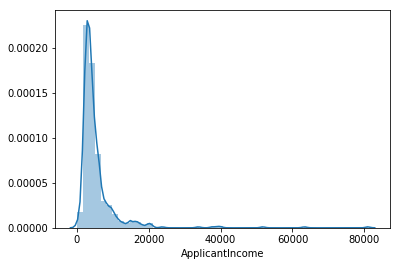

In [73]:
sns.distplot(df["ApplicantIncome"])

C:\Python 2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


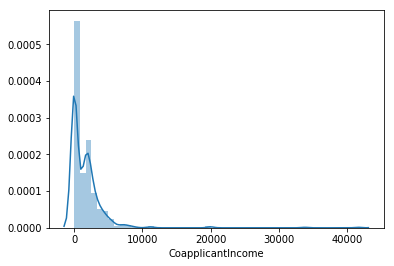

In [74]:
sns.distplot(df["CoapplicantIncome"])

C:\Python 2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


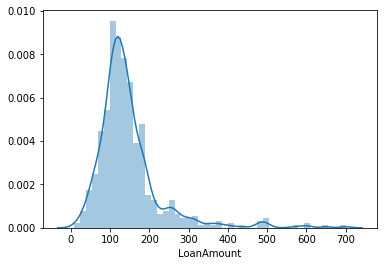

In [81]:
sns.distplot(df["LoanAmount"])

C:\Python 2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


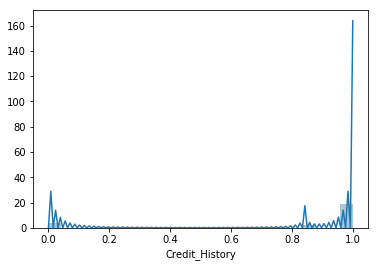

In [82]:
sns.distplot(df["Credit_History"])

C:\Python 2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


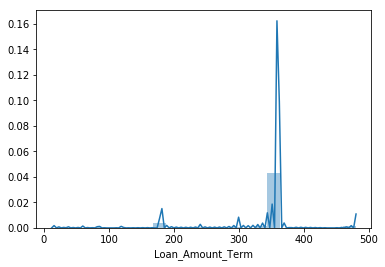

In [83]:
sns.distplot(df["Loan_Amount_Term"])


In [84]:
#features such as ApplicantIncome ,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term are clearly skewed and not equally distributed

In [85]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

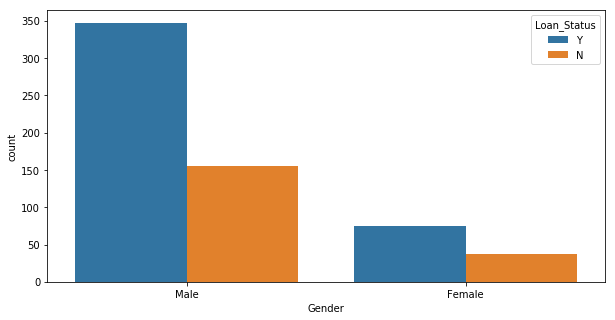

In [103]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Gender",hue="Loan_Status",data=df)

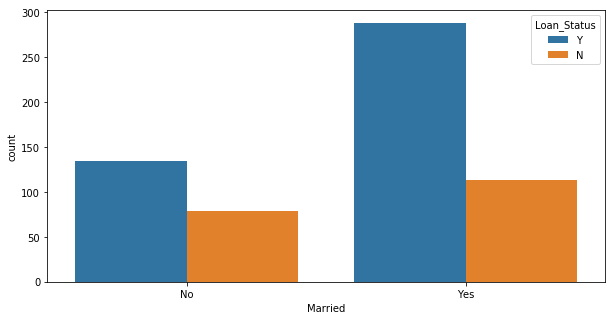

In [104]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Married",hue="Loan_Status",data=df)

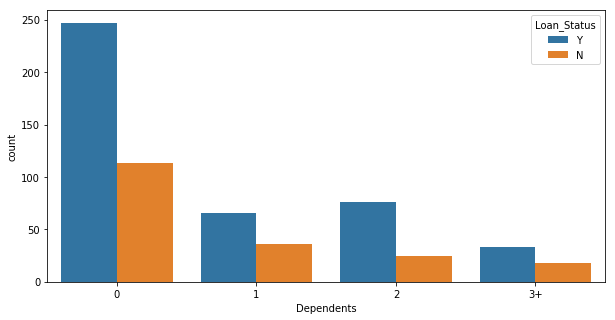

In [105]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

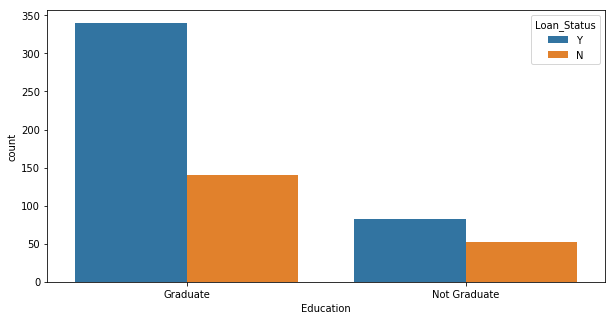

In [106]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Education",hue="Loan_Status",data=df)

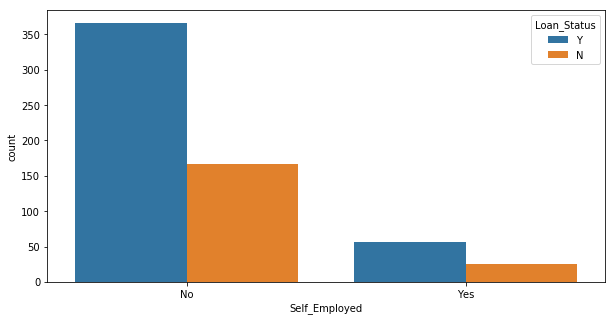

In [107]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

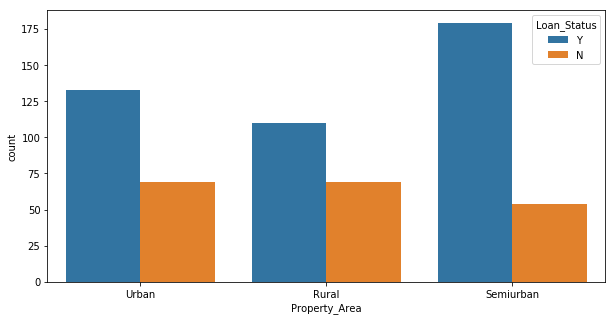

In [108]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Property_Area",hue="Loan_Status",data=df)

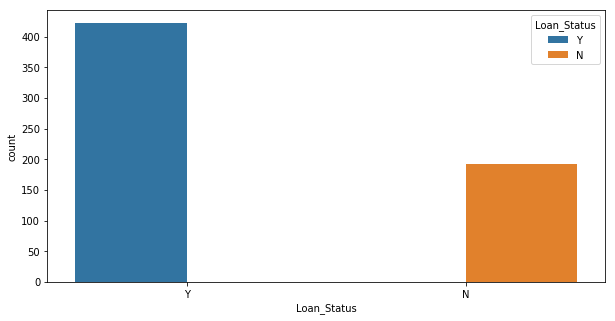

In [109]:
plt.figure(figsize=(10,5),facecolor="white")
sns.countplot(x="Loan_Status",hue="Loan_Status",data=df)

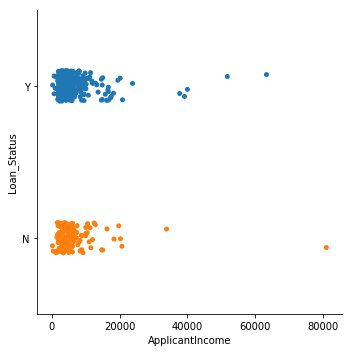

In [94]:
sns.catplot(x="ApplicantIncome",y="Loan_Status",data=df)

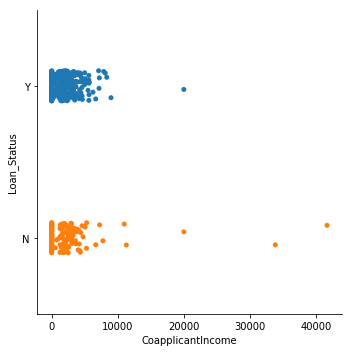

In [95]:
 
sns.catplot(x="CoapplicantIncome",y="Loan_Status",data=df)

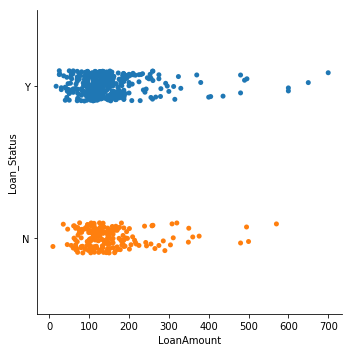

In [98]:
sns.catplot(x="LoanAmount",y="Loan_Status",data=df)

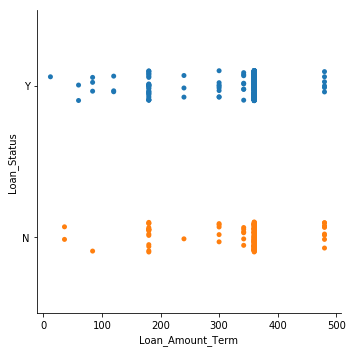

In [99]:
sns.catplot(x="Loan_Amount_Term",y="Loan_Status",data=df)

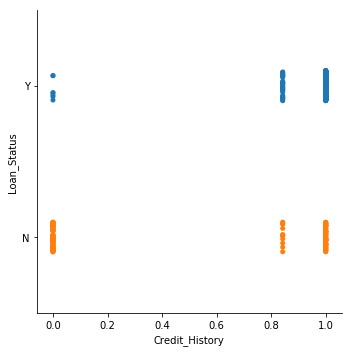

In [100]:
sns.catplot(x="Credit_History",y="Loan_Status",data=df)

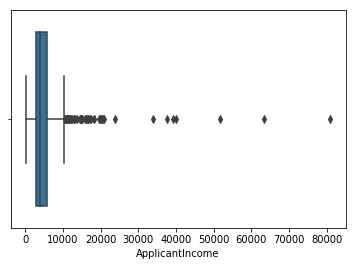

In [111]:
sns.boxplot(df["ApplicantIncome"])

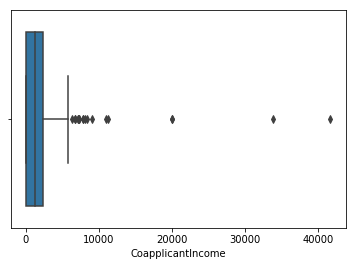

In [114]:
sns.boxplot(df["CoapplicantIncome"])

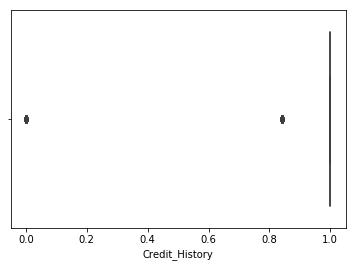

In [115]:
sns.boxplot(df["Credit_History"])

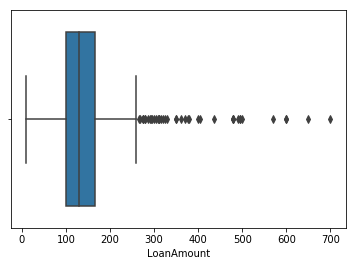

In [116]:
sns.boxplot(df["LoanAmount"])

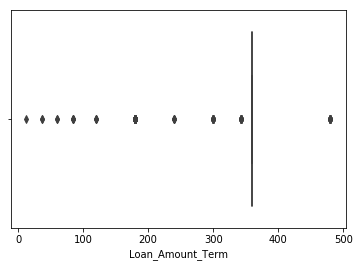

In [117]:
sns.boxplot(df["Loan_Amount_Term"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201DB836B70>,
      dtype=object)

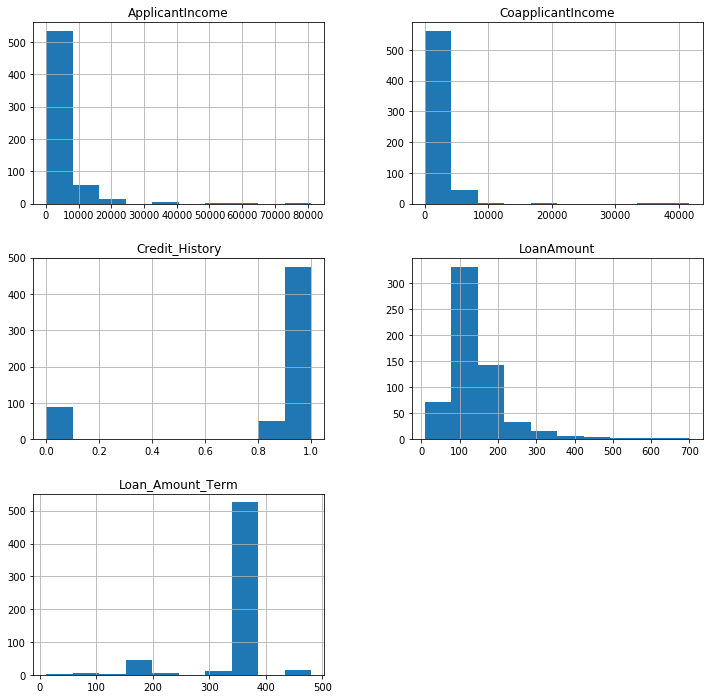

In [119]:
df[list(num_set.index)].hist(figsize = (12,12))

In [121]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [125]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [126]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


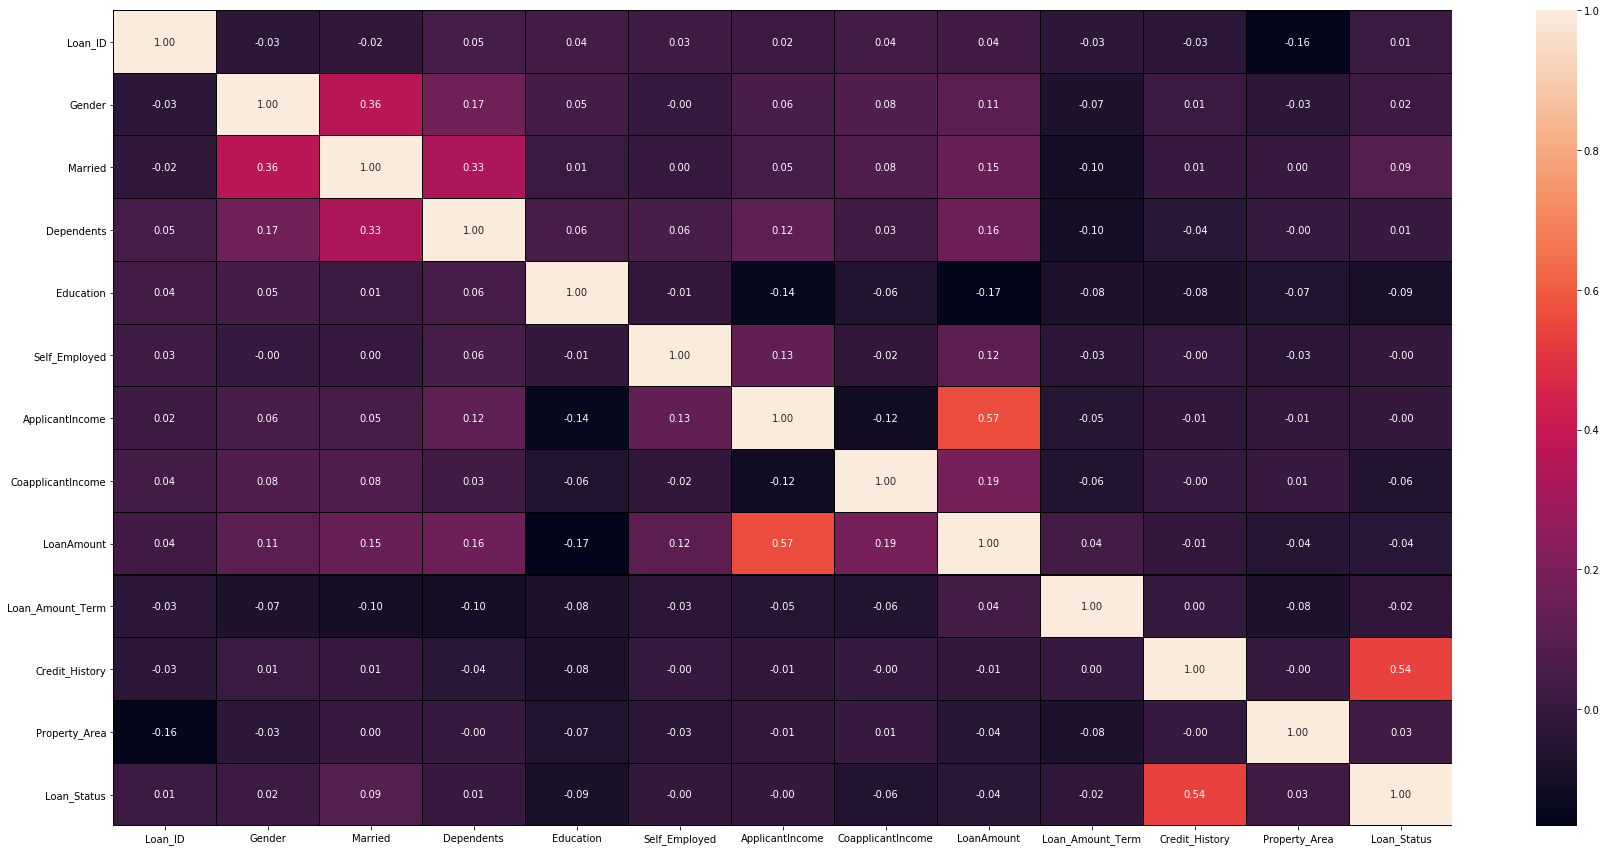

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

In [128]:
##from heatmap it can derived that Credit_History has very strong relationship with Loan_Status

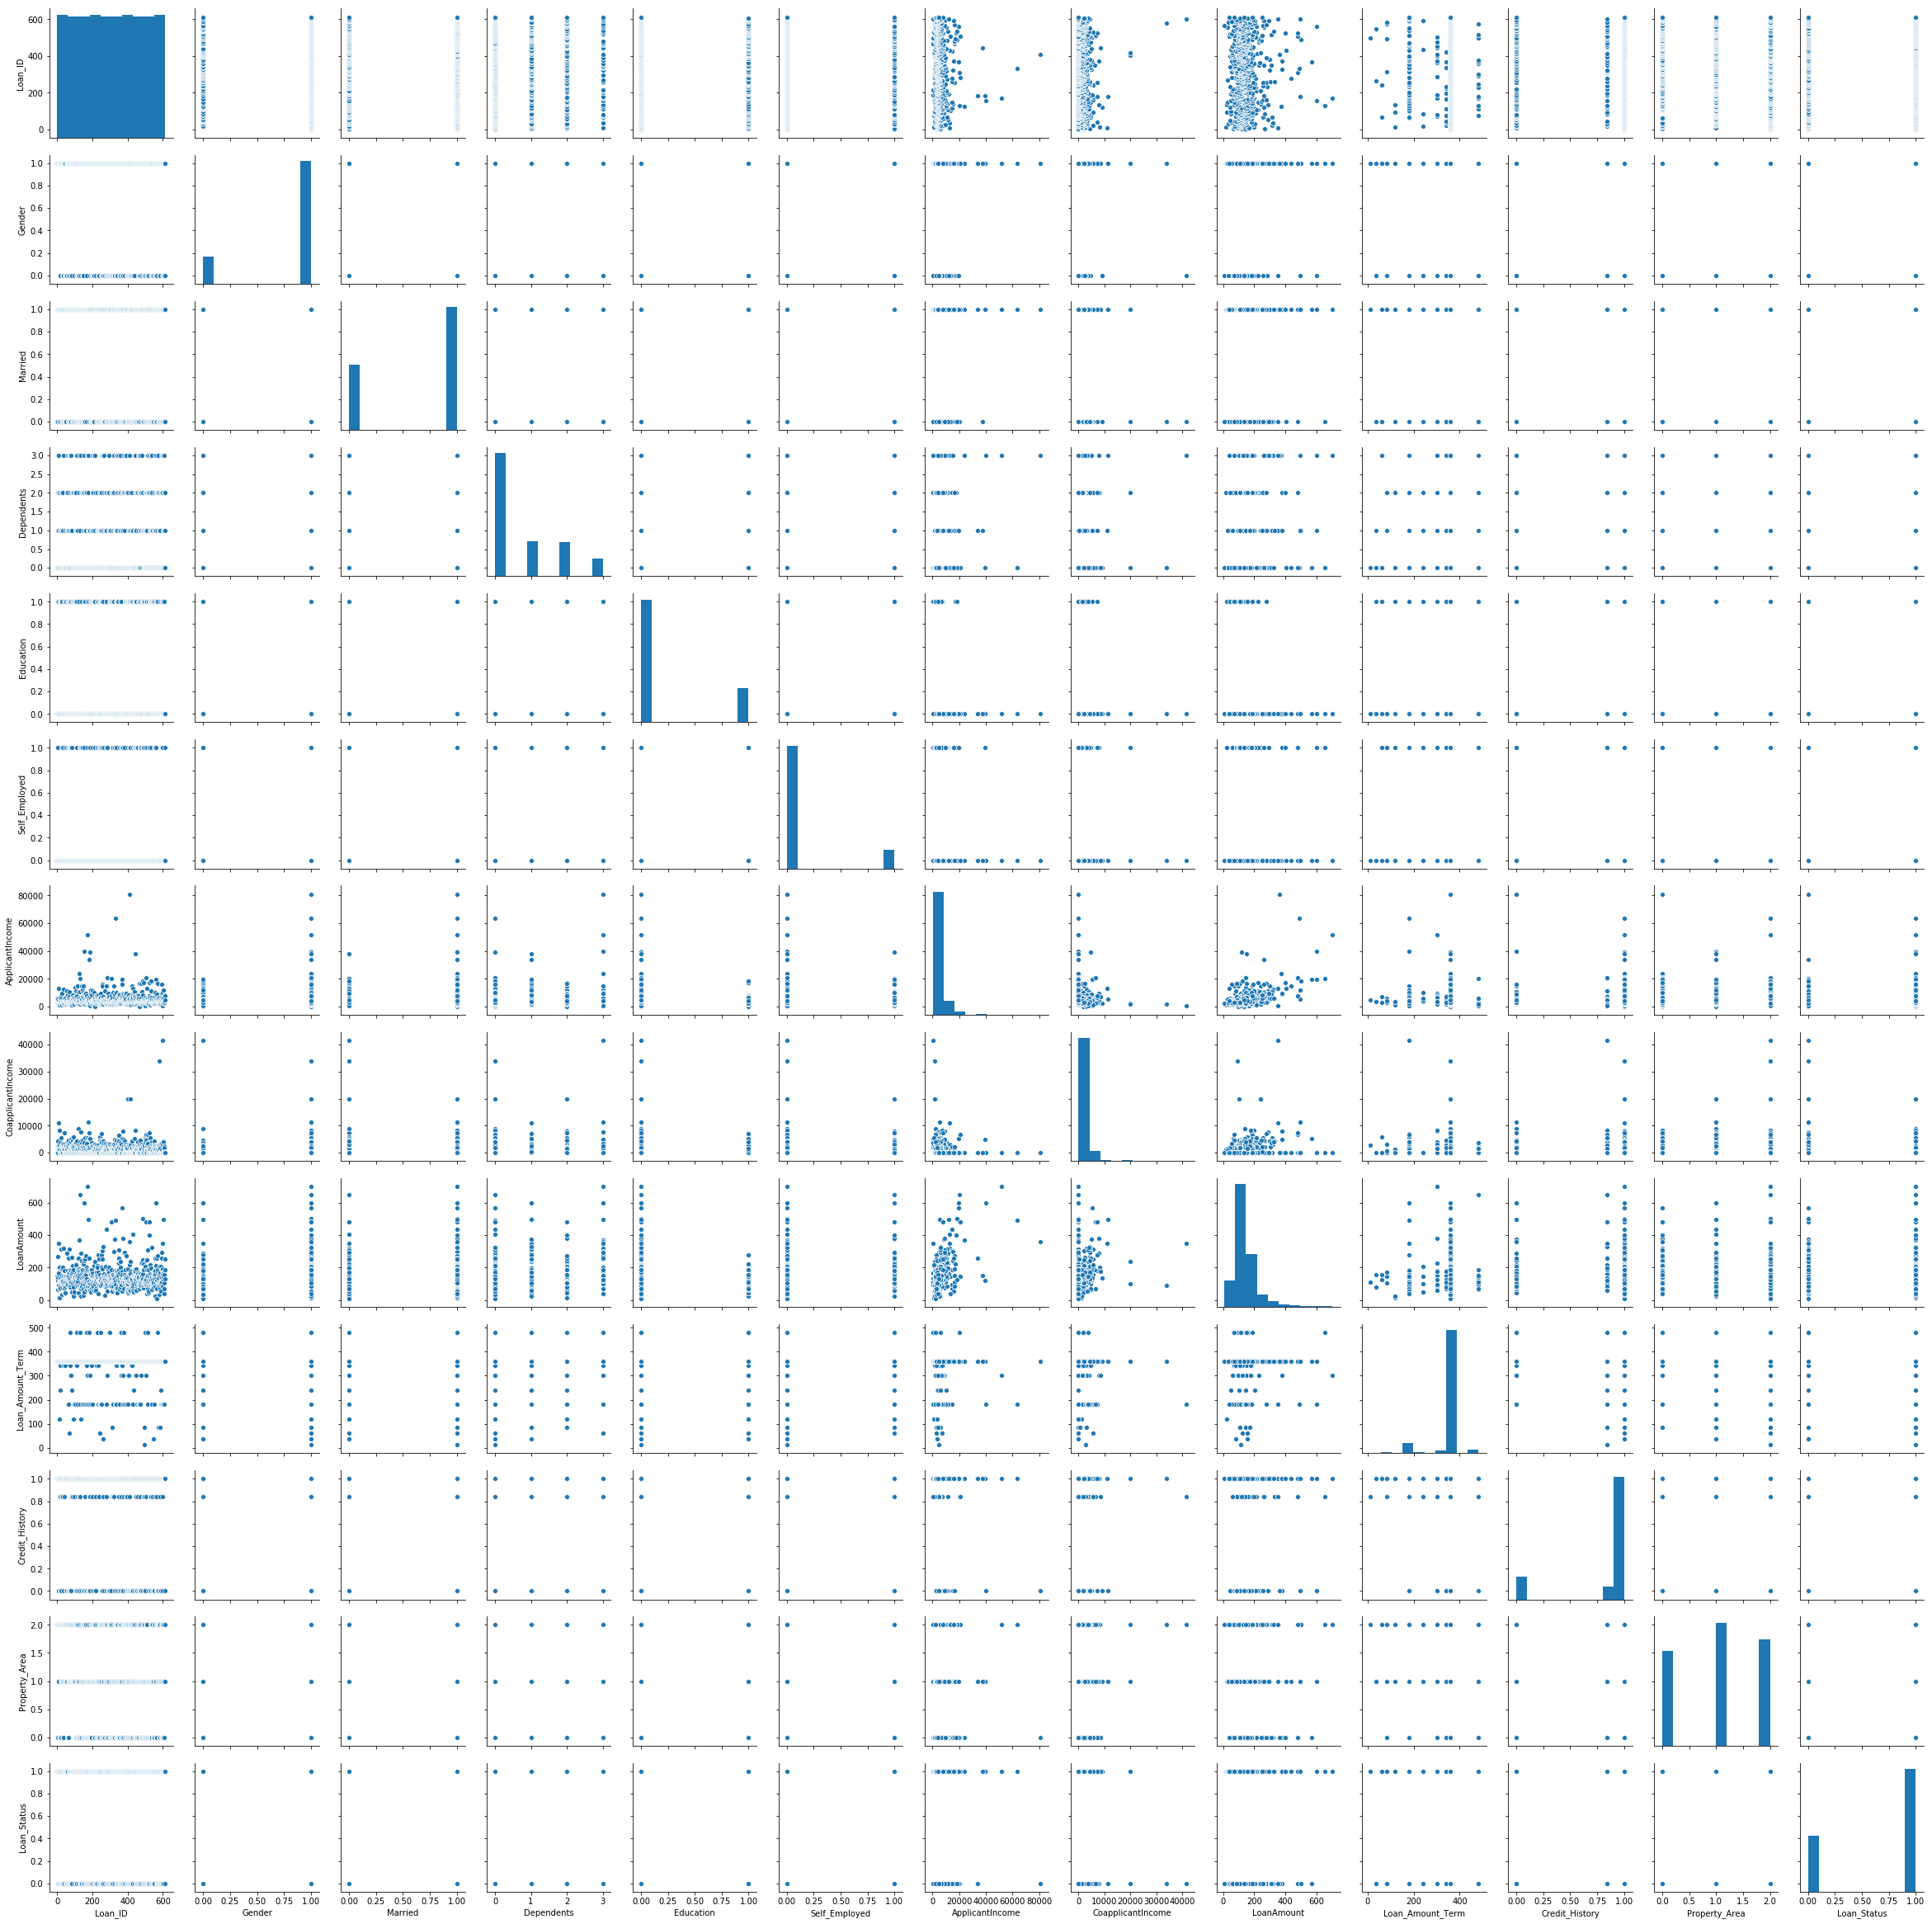

In [129]:
sns.pairplot(df)

In [131]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df["ApplicantIncome"]=scale.fit_transform(df["ApplicantIncome"].values.reshape(-1,1))

In [132]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df["CoapplicantIncome"]=scale.fit_transform(df["CoapplicantIncome"].values.reshape(-1,1))

In [133]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df["LoanAmount"]=scale.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [134]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df["Credit_History"]=scale.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [135]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df["Loan_Amount_Term"]=scale.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))

In [137]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,2.0,1.0


In [138]:
y=df["Loan_Status"]

In [140]:
x=df.drop(columns=["Loan_ID","Loan_Status"],axis=1)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [142]:
Maxr2=0
BestRs=0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    accu=accuracy_score(pred,ytest)
    if accu>Maxr2:
        Maxr2=accu
        BestRs=i
print("with random state as",BestRs,"max accuracy is",Maxr2)

with random state as 8 max accuracy is 0.8648648648648649


In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=8)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))


              precision    recall  f1-score   support

         0.0       0.54      0.97      0.69        29
         1.0       0.99      0.85      0.91       156

    accuracy                           0.86       185
   macro avg       0.77      0.91      0.80       185
weighted avg       0.92      0.86      0.88       185

0.8648648648648649
[[ 28   1]
 [ 24 132]]


In [144]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(xtrain,ytrain)
pred=RFC.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.58      0.75      0.65        40
         1.0       0.92      0.85      0.88       145

    accuracy                           0.83       185
   macro avg       0.75      0.80      0.77       185
weighted avg       0.85      0.83      0.83       185

0.827027027027027
[[ 30  10]
 [ 22 123]]


In [145]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.58      0.57      0.57        53
         1.0       0.83      0.83      0.83       132

    accuracy                           0.76       185
   macro avg       0.70      0.70      0.70       185
weighted avg       0.76      0.76      0.76       185

0.7567567567567568
[[ 30  23]
 [ 22 110]]


In [146]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.54      0.97      0.69        29
         1.0       0.99      0.85      0.91       156

    accuracy                           0.86       185
   macro avg       0.77      0.91      0.80       185
weighted avg       0.92      0.86      0.88       185

0.8648648648648649
[[ 28   1]
 [ 24 132]]


In [148]:
from sklearn.model_selection import cross_val_score
model=[lr,RFC,dtc,svc]

for model in model:
    print(cross_val_score(model,x,y,cv=5).mean())

0.8078368652538984
0.7883113421298148
0.7248167399706784
0.809462881514061


In [154]:
#from accuracy score and cross val score difference we can infer that DecisionTreeClassifier is the best model out of all
#DecisionTreeClassifier has minimum difference between accuracy score and cross val score
#So we will proceed with parameter tuning using gridsearchCV

In [155]:
from sklearn.model_selection import GridSearchCV
parameter={"max_depth":np.arange(2,10),"criterion":["gini","entropy"]}
grid=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_score_)
print(grid.best_params_)

0.7855540355677154
{'criterion': 'entropy', 'max_depth': 2}


In [157]:
#from the grid search it can be identied that what are the best parameters.
#{'criterion': 'entropy', 'max_depth': 2 }
#Now parameters can be used to develop final model

finaldtc=DecisionTreeClassifier(criterion='entropy',max_depth=2)
finaldtc.fit(xtrain,ytrain)
pred=finaldtc.predict(xtest)
accu=accuracy_score(pred,ytest)
print(classification_report(pred,ytest))
print(accu)
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

         0.0       0.54      0.93      0.68        30
         1.0       0.98      0.85      0.91       155

    accuracy                           0.86       185
   macro avg       0.76      0.89      0.80       185
weighted avg       0.91      0.86      0.87       185

0.8594594594594595
[[ 28   2]
 [ 24 131]]


In [ ]:
#So DecisionTreeClassifier have a accuracy score of 85.94% using the parameter tuning
#DecisionTreeClassifier is the final model and we will save it using joblib

In [159]:
import joblib
joblib.dump(finaldtc,"loan_application_status.obj")

['loan_application_status.obj']